# Importing Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Data Analysis

In [7]:
df = pd.read_csv('Mall_Customers.csv')

In [9]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [17]:
df.shape

(200, 5)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [21]:
df.isnull()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [23]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Choosing the Annual Income column & Spending Score column

In [32]:
X = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [34]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# Choosing the number of cluster

In [41]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "1"


In [43]:
wcss = []
for i in range(1 , 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [39]:
wcss

[269981.28,
 183653.32894736843,
 106348.37306211118,
 73880.64496247194,
 44448.45544793371,
 40825.16946386946,
 33642.579220779226,
 26686.837785187785,
 24766.47160979344,
 23103.122085983916]

# Elbow graph

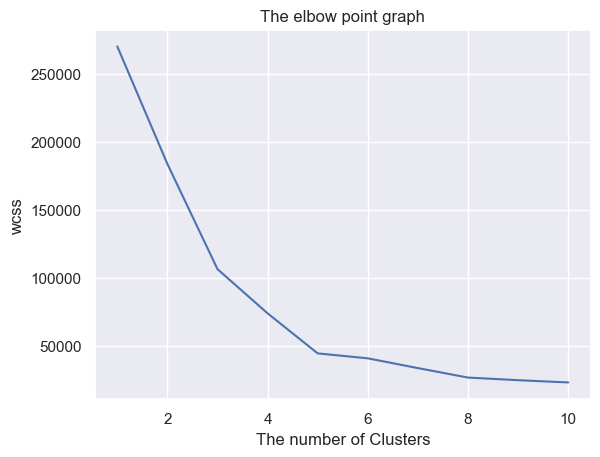

In [46]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The elbow point graph')
plt.xlabel('The number of Clusters')
plt.ylabel('wcss')
plt.show()

# Optimum number of cluster is 5

# Training the K-Means Clustering Model

In [60]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)


In [64]:
# Return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


# Visualizing the clusters

In [77]:
X = X.values   # convert DataFrame to numpy array


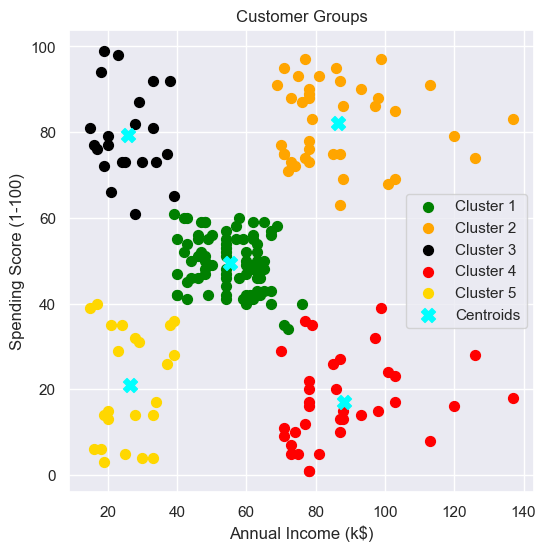

In [79]:
plt.figure(figsize=(6,6))
plt.scatter(X[Y==0, 0], X[Y==0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1, 0], X[Y==1, 1], s=50, c='orange', label='Cluster 2')
plt.scatter(X[Y==2, 0], X[Y==2, 1], s=50, c='black', label='Cluster 3')
plt.scatter(X[Y==3, 0], X[Y==3, 1], s=50, c='red', label='Cluster 4')
plt.scatter(X[Y==4, 0], X[Y==4, 1], s=50, c='gold', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=100, c='cyan', marker='X', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


# Performance score

In [82]:

score = silhouette_score(X, Y)
print("Silhouette Score:", score)


Silhouette Score: 0.553931997444648


In [84]:
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(X, Y)
print("Calinski-Harabasz Score:", ch_score)


Calinski-Harabasz Score: 247.35899338037288


In [86]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(X, Y)
print("Davies-Bouldin Index:", db_score)


Davies-Bouldin Index: 0.5725628995597086
